<a href="https://colab.research.google.com/github/pizolotov/data_tree/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Tree_evaluated_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [19]:
url = 'https://raw.githubusercontent.com/pizolotov/data_tree/main/dataset_16_01_2023.csv'
df = pd.read_csv(url)

In [20]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Deposition_Time  806 non-null    int64  
 1   Operation_Time   806 non-null    float64
 2   Substrate_T      806 non-null    int64  
 3   Ar               806 non-null    int64  
 4   N2               806 non-null    float64
 5   U                806 non-null    int64  
 6   dU               806 non-null    int64  
 7   power            806 non-null    float64
 8   w_p              806 non-null    float64
 9   goodtc           806 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 63.1 KB


In [21]:
df.shape

(806, 10)

In [35]:
cols_at_end = ['goodtc']
dataset = dataset[[c for c in dataset if c not in cols_at_end]
        + [c for c in cols_at_end if c in dataset]]

**FILTERING**

In [36]:
df.replace('null', None, inplace=True)
df.replace('--', None, inplace=True)
df.replace('NaN', None, inplace=True)
df.dropna( how='any', inplace=True)
df.shape

(806, 10)

In [31]:
# df_filtered = df[df['Proc#'] <= 2500]
# df_filtered.shape

In [15]:
# dataset = df.drop(['Mat','Proc#','substrate_id','Tc','Rs','RRR'], axis=1)

In [37]:
dataset = df.astype({
#  # 'Rs20':                'float64',
'Deposition_Time':      'float64',
'Operation_Time':     'float64',
# 'Rs':                 'float64',
# 'Tc':                 'float64',
# 'RRR':                'float64',
'Substrate_T':         'float64',
'Ar':                  'float64',
'N2':                'float64',
# # 'N2_conc':                'float64',
'U':                  'float64',
'dU':                 'float64',
'w_p':               'float64',
# # 'du_perc':           'float64',
# # 'V_dep_Er':           'float64',
# # 'I':             'float64'})

})

In [38]:
dataset = dataset[
                    #(dataset['Rs20'] >= 0)&
                  #(dataset['Deposition Time'] >= 0)&
                  #(dataset['Operation Time'] >= 0)&
                  #(dataset['Rs'] >= 0)&
                  #(dataset['Tc'] >= 0)&
                  #(dataset['RRR'] >= 0)&
                  (dataset['Substrate_T'] >= 0)&
                  (dataset['Ar'] >= 0)&
                  #(dataset['N2'] >= 0)&
                  # (dataset['N2_conc'] >= 0)&
                  (dataset['U'] >= 0)&
                  #(dataset['dU'] >= 0)&
                  # (dataset['du_perc'] >= 0)&
                  # (dataset['power'] >= 0)&
                  (dataset['w_p'] >= 0)]
                  # (dataset['I'] >= 0)

dataset.shape

(806, 10)

In [39]:
dataset.sample(10)

,Deposition_Time,Operation_Time,Substrate_T,Ar,N2,U,dU,power,w_p,goodtc
217,100.0,22.285714,400.0,40.0,8.0,336.0,32.0,250.0,3.31,1
55,110.0,42.000000,400.0,30.0,9.0,348.0,51.0,245.3,5.60,1
127,155.0,38.800000,300.0,40.0,7.0,332.0,35.0,225.7,3.25,1
165,108.0,41.885714,300.0,39.0,8.0,343.0,40.0,235.4,3.25,1
225,120.0,5.142857,400.0,30.0,8.0,347.0,32.0,250.0,2.75,1
695,78.0,59.000000,360.0,40.0,10.0,355.0,56.0,243.0,3.50,0
495,140.0,73.714286,400.0,40.0,5.0,334.0,34.0,140.0,3.30,1
113,100.0,56.971429,300.0,40.0,8.5,343.0,47.0,239.7,3.33,0
611,97.0,81.000000,400.0,40.0,10.0,368.0,53.0,192.0,3.60,1
81,85.0,42.000000,300.0,40.0,7.0,334.0,36.0,227.5,3.25,0


**TREE**

accuracy score = 0.8101736972704715


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


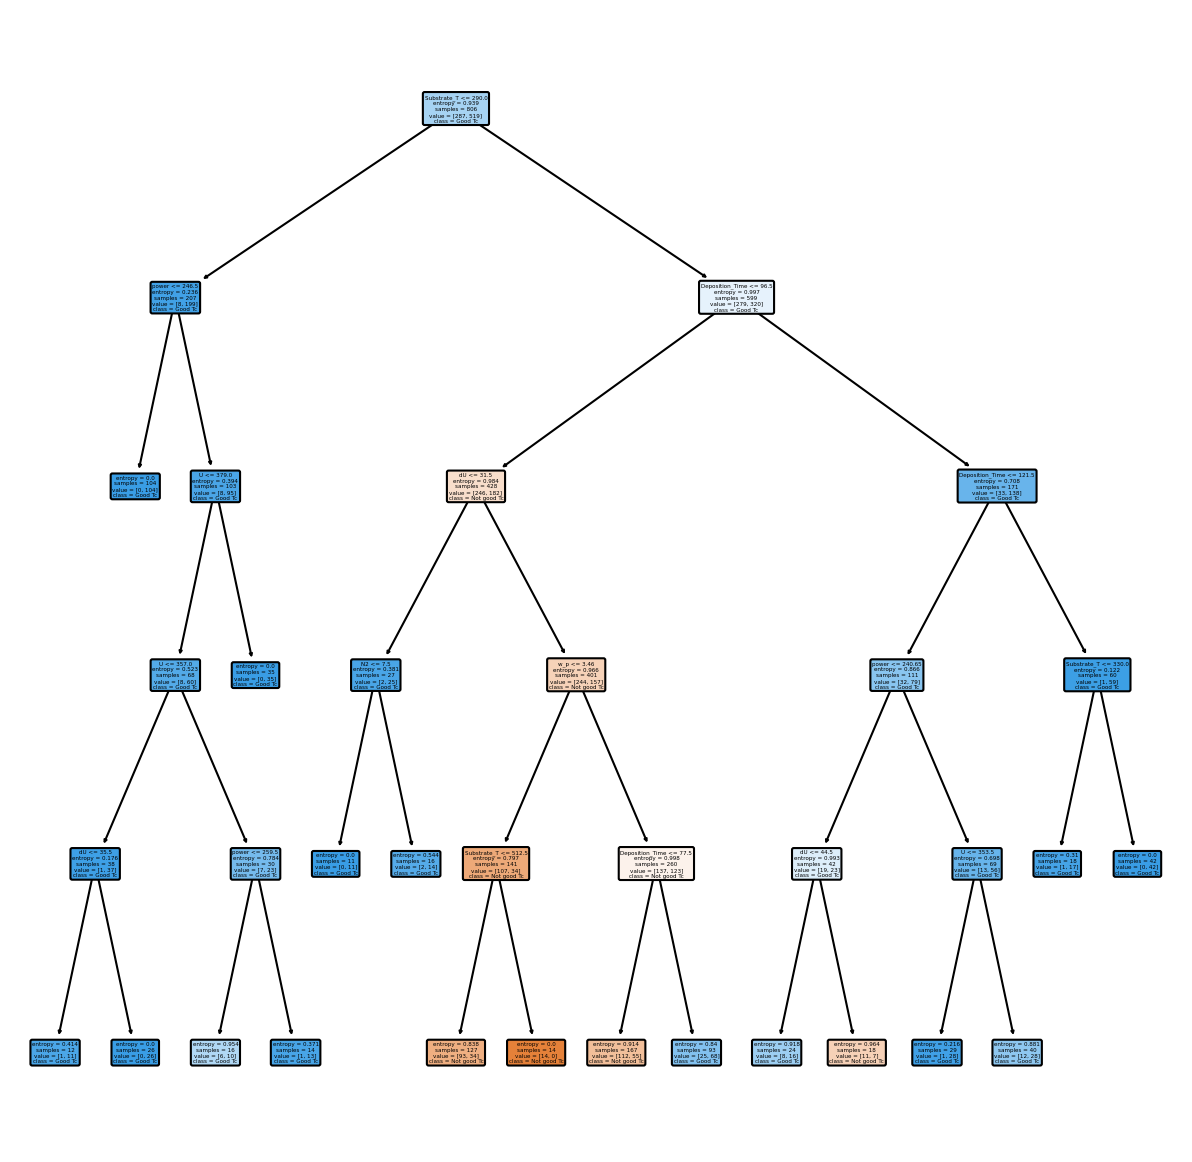

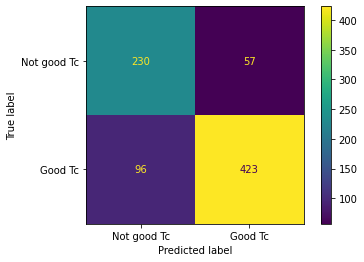

In [46]:
#Создали дерево (Александра)
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_split=10, min_samples_leaf=10, max_depth=5)
#Обучили дерево на наших данных
clf.fit(dataset.drop(columns=['goodtc']), dataset['goodtc'])

print('accuracy score =', accuracy_score(dataset['goodtc'], clf.predict(dataset.drop(columns=['goodtc']))))
plt.figure(figsize=(10, 10), dpi=150)
descr = tree.plot_tree(clf, feature_names=dataset.columns[:-1], filled=True,rounded=True, class_names=["Not good Tc", "Good Tc"])

plot_confusion_matrix(clf,dataset.drop(columns=['goodtc']), dataset['goodtc'],display_labels=["Not good Tc",
                                                            "Good Tc"])